# 1 . Import libraries

In [ ]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2 . Load data

In [ ]:
# Dữ liệu giao dịch (downloading from Google Drive to local path)
file_id = '104tCgXR04q30NzZhUarMAXaqIO5IAEKi'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'transactions_data.csv'
gdown.download(url, output, quiet=False)
trans = pd.read_csv(output)

# Thông tin cá nhân người dùng
file_id = '1lKEAkm4Yqo3sUeRooKqmMg7iR_LyhsW8'
url = 'https://drive.google.com/uc?id='
users = pd.read_csv(url + file_id)

# Thông tin thẻ
file_id = '1ZK-s7Ja6BgOCTfAygQYuGSZj4GrANFoR'
url = 'https://drive.google.com/uc?id='
cards = pd.read_csv(url + file_id)

# Thông tin mã ngành
file_id = '1E6fMv4QwbnubYz5l3b6PdNtMFy4S_Obq'
url = 'https://drive.google.com/uc?id='
mcc_raw = pd.read_json(url + file_id, typ='series')
mcc_codes = mcc_raw.reset_index()
mcc_codes.columns = ['mcc', 'description']

# Thông tin Gross Margin (by using a reseach online
# from the link https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/margin.html)
url = 'https://raw.githubusercontent.com/TuanTran2025/Final-Project/main/mcc_gross_margin.xlsx'
mcc_gross_margin = pd.read_excel(url, sheet_name='MCC')

Downloading...
From (original): https://drive.google.com/uc?id=104tCgXR04q30NzZhUarMAXaqIO5IAEKi
From (redirected): https://drive.google.com/uc?id=104tCgXR04q30NzZhUarMAXaqIO5IAEKi&confirm=t&uuid=84f81f98-373f-466c-9c24-1d2aa301fdd2
To: /content/transactions_data.csv
100%|██████████| 1.26G/1.26G [00:20<00:00, 62.7MB/s]


# 3 . Data clean

## 3.1. Users Data

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB


In [ ]:
users.sample(2)

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
106,697,56,73,1964,1,Female,889 Martin Luther King Avenue,35.72,-78.84,"$32,485","$66,230","$90,248",742,3
458,1686,54,67,1965,3,Female,401 North Avenue,39.99,-105.09,"$30,072","$61,312","$25,355",708,3


### Fixing data type

In [ ]:
# Đổi tên cột 'id' cho chuẩn hóa khóa
users = users.rename(columns={'id': 'client_id'})

# Chuyển cột 'gender' sang kiểu category
users['gender'] = users['gender'].astype('category')

# Chuyển cột 'address' sang kiểu string
users['address'] = users['address'].astype('string')

# Loại bỏ ký tự $ trong cột 'per_capita_income', 'yearly_income', 'total_debt', chuyển sang kiểu float
users['per_capita_income'] = users['per_capita_income'].replace('[\$,]', '', regex=True).astype(float)
users['yearly_income'] = users['yearly_income'].replace('[\$,]', '', regex=True).astype(float)
users['total_debt'] = users['total_debt'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   client_id          2000 non-null   int64   
 1   current_age        2000 non-null   int64   
 2   retirement_age     2000 non-null   int64   
 3   birth_year         2000 non-null   int64   
 4   birth_month        2000 non-null   int64   
 5   gender             2000 non-null   category
 6   address            2000 non-null   string  
 7   latitude           2000 non-null   float64 
 8   longitude          2000 non-null   float64 
 9   per_capita_income  2000 non-null   float64 
 10  yearly_income      2000 non-null   float64 
 11  total_debt         2000 non-null   float64 
 12  credit_score       2000 non-null   int64   
 13  num_credit_cards   2000 non-null   int64   
dtypes: category(1), float64(5), int64(7), string(1)
memory usage: 205.3 KB


### Checking duplication & missing values

In [ ]:
# Checking duplicated values => there is NO DUPLICATED VALUES in the users dataframe
users.duplicated().sum()

np.int64(0)

In [ ]:
# Checking missing values => there is NO MISSING VALUES in the users dataframe
users.isnull().sum()

,0
client_id,0
current_age,0
retirement_age,0
birth_year,0
birth_month,0
gender,0
address,0
latitude,0
longitude,0
per_capita_income,0


In [ ]:
users.sample(2)

,client_id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
481,1156,56,69,1963,6,Female,9603 South Lane,40.74,-74.33,137428.0,280199.0,91367.0,752,5
588,490,86,68,1933,9,Male,90 Lexington Drive,29.45,-98.50,29557.0,33426.0,1852.0,699,4


## 3.2. Cards Data

In [ ]:
cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     6146 non-null   int64  
 1   client_id              6146 non-null   int64  
 2   card_brand             6146 non-null   object 
 3   card_type              6146 non-null   object 
 4   card_number            6146 non-null   float64
 5   expires                6146 non-null   object 
 6   cvv                    6146 non-null   int64  
 7   has_chip               6146 non-null   object 
 8   num_cards_issued       6146 non-null   int64  
 9   credit_limit           6146 non-null   object 
 10  acct_open_date         6146 non-null   object 
 11  year_pin_last_changed  6146 non-null   int64  
 12  card_on_dark_web       6146 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 624.3+ KB


In [ ]:
cards.sample(2)

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
4624,5036,1621,Visa,Credit,4.601496e+15,Apr-12,833,YES,1,"$17,000",Oct-05,2016,No
1166,1811,339,Visa,Debit,4.728986e+15,May-21,894,YES,2,"$13,964",Feb-20,2020,No


### Fixing data type

In [ ]:
# Đổi tên cột 'id' cho chuẩn hóa khóa
cards = cards.rename(columns={'id': 'card_id'})

# Chuyển cột 'card_brand', 'has_chip', 'card_on_dark_web' sang kiểu category
cards['card_brand'] = cards['card_brand'].astype('category')
cards['has_chip'] = cards['has_chip'].astype('category')
cards['card_on_dark_web'] = cards['card_on_dark_web'].astype('category')

# Loại bỏ cụm từ 'Debit ( )' trong cột 'card_type', chuyển sang kiểu category
cards['card_type'] = cards['card_type'].str.replace('Debit (', '', regex=False) #.str.strip()
cards['card_type'] = cards['card_type'].str.replace(')', '', regex=False) #.str.strip()
cards['card_type'] = cards['card_type'].astype('category')

# Chuyển cột 'card_number' sang kiểu integer
cards['card_number'] = cards['card_number'].astype('Int64')

# Chuyển cột 'expires', 'acct_open_date' sang kiểu datetime
cards['expires'] = pd.to_datetime(cards['expires'], format='%b-%y')
cards['acct_open_date'] = pd.to_datetime(cards['acct_open_date'], format='%b-%y')

# Loại bỏ ký tự $ trong cột 'credit_limit', chuyển sang kiểu float
cards['credit_limit'] = cards['credit_limit'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   card_id                6146 non-null   int64         
 1   client_id              6146 non-null   int64         
 2   card_brand             6146 non-null   category      
 3   card_type              6146 non-null   category      
 4   card_number            6146 non-null   Int64         
 5   expires                6146 non-null   datetime64[ns]
 6   cvv                    6146 non-null   int64         
 7   has_chip               6146 non-null   category      
 8   num_cards_issued       6146 non-null   int64         
 9   credit_limit           6146 non-null   float64       
 10  acct_open_date         6146 non-null   datetime64[ns]
 11  year_pin_last_changed  6146 non-null   int64         
 12  card_on_dark_web       6146 non-null   category      
dtypes: 

### Checking duplication & missing values

In [ ]:
# Checking duplicated values => there is nNO DUPLICATED VALUES in the cards dataframe
cards.duplicated().sum()

np.int64(0)

In [ ]:
# Checking missing values => there is NO MISSING VALUES in the cards dataframe
cards.isnull().sum()

,0
card_id,0
client_id,0
card_brand,0
card_type,0
card_number,0
expires,0
cvv,0
has_chip,0
num_cards_issued,0
credit_limit,0


In [ ]:
cards.sample(2)

,card_id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
336,755,1301,Visa,Debit,4912898188628991,2022-11-01,446,YES,1,48502.0,2020-01-01,2020,No
267,1238,900,Visa,Prepaid,4580252759299284,2021-02-01,397,YES,2,68.0,2010-02-01,2010,No


## 3.3. Transactions Data

In [ ]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   date            object 
 2   client_id       int64  
 3   card_id         int64  
 4   amount          object 
 5   use_chip        object 
 6   merchant_id     int64  
 7   merchant_city   object 
 8   merchant_state  object 
 9   zip             float64
 10  mcc             int64  
 11  errors          object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.2+ GB


In [ ]:
trans.sample(2)

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
11953883,22089030,2018-11-11 14:26:00,952,1275,$449.17,Online Transaction,50292,ONLINE,NaN,NaN,7801,NaN
12273726,22484486,2019-02-03 11:56:00,1818,3418,$112.87,Chip Transaction,32858,Norfolk,VA,23502.0,5311,NaN


### Fixing data type

In [ ]:
# Đổi tên cột 'id' cho chuẩn hóa khóa
trans = trans.rename(columns={'id': 'trans_id'})

# Chuyển cột 'date' sang kiểu datetime
trans['date'] = pd.to_datetime(trans['date'])

# Loại bỏ ký tự $ trong cột 'amount', chuyển sang kiểu float
trans['amount'] = trans['amount'].replace('[\$,]', '', regex=True).astype(float)

# Chuyển cột 'merchant_id', 'zip', 'mcc' sang kiểu Integer
trans['merchant_id'] = trans['merchant_id'].astype('Int64')
trans['zip'] = trans['zip'].astype('Int64')
trans['mcc'] = trans['mcc'].astype('Int64')

# Loại bỏ chữ 'Transaction' trong cột 'use_chip', chuyển sang kiểu category
trans['use_chip'] = trans['use_chip'].str.replace(' Transaction', '', regex=False) #.str.strip()
trans['use_chip'] = trans['use_chip'].astype('category')

# Chuyển cột 'merchant_city', 'merchant_state', 'errors' sang kiểu category
trans['merchant_city'] = trans['merchant_city'].astype('category')
trans['merchant_state'] = trans['merchant_state'].astype('category')
trans['errors'] = trans['errors'].astype('category')

In [ ]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   trans_id        int64         
 1   date            datetime64[ns]
 2   client_id       int64         
 3   card_id         int64         
 4   amount          float64       
 5   use_chip        category      
 6   merchant_id     Int64         
 7   merchant_city   category      
 8   merchant_state  category      
 9   zip             Int64         
 10  mcc             Int64         
 11  errors          category      
dtypes: Int64(3), category(4), datetime64[ns](1), float64(1), int64(3)
memory usage: 926.7 MB


### Checking duplication & missing values

In [ ]:
# Checking duplicated values => there is NO DUPLICATED VALUES in the transaction dataframe
trans.duplicated().sum()

np.int64(0)

In [ ]:
# Checking missing values
trans.isnull().sum()

,0
trans_id,0
date,0
client_id,0
card_id,0
amount,0
use_chip,0
merchant_id,0
merchant_city,0
merchant_state,1563700
zip,1652706


### Explaination of null values

In [ ]:
trans[trans['zip'].isnull()]

# The 'merchant_state' column has 1,563,671 null values which means all online transactions
# The 'zip' column has 1,652,616 null values which means the online transactions or the locations without zipcode
# The 'errors' column has 13,094,522 null values which means the successful transactions (without errors)

,trans_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
7,7475335,2010-01-01 00:14:00,1684,2140,26.46,Online,39021,ONLINE,NaN,<NA>,4784,NaN
8,7475336,2010-01-01 00:21:00,335,5131,261.58,Online,50292,ONLINE,NaN,<NA>,7801,NaN
18,7475346,2010-01-01 00:34:00,394,4717,26.04,Online,39021,ONLINE,NaN,<NA>,4784,NaN
24,7475353,2010-01-01 00:43:00,301,3742,10.17,Online,39021,ONLINE,NaN,<NA>,4784,NaN
26,7475356,2010-01-01 00:45:00,566,3439,16.86,Online,16798,ONLINE,NaN,<NA>,4121,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13305879,23761832,2019-10-31 23:22:00,1556,2972,17.65,Online,88459,ONLINE,NaN,<NA>,5311,NaN
13305880,23761833,2019-10-31 23:22:00,1797,5660,34.81,Online,15143,ONLINE,NaN,<NA>,4784,NaN
13305888,23761843,2019-10-31 23:33:00,1069,5167,59.71,Online,39021,ONLINE,NaN,<NA>,4784,NaN
13305897,23761853,2019-10-31 23:39:00,1422,5696,694.30,Online,70268,ONLINE,NaN,<NA>,4722,NaN


### Checking negative values

In [ ]:
# Negative values are the refunded transactions
trans[trans['amount'] < 0]

,trans_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,-77.0,Swipe,59935,Beulah,ND,58523,5499,NaN
19,7475347,2010-01-01 00:36:00,114,3398,-64.0,Swipe,61195,North Hollywood,CA,91606,5541,NaN
50,7475382,2010-01-01 01:25:00,1703,2969,-78.0,Swipe,43293,Grand Junction,CO,81506,5499,NaN
81,7475422,2010-01-01 02:13:00,1453,1117,-460.0,Swipe,5009,Middletown,NY,10940,7011,NaN
114,7475460,2010-01-01 03:08:00,957,4532,-147.0,Swipe,44795,Marysville,OH,43040,3780,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13305780,23761706,2019-10-31 22:13:00,1360,143,-91.0,Chip,59935,Crestview,FL,32536,5499,NaN
13305811,23761745,2019-10-31 22:28:00,194,5587,-71.0,Swipe,59935,Hartford City,IN,47348,5499,NaN
13305813,23761747,2019-10-31 22:29:00,133,4683,-52.0,Chip,61195,Marietta,GA,30067,5541,NaN
13305820,23761757,2019-10-31 22:35:00,260,323,-77.0,Chip,22204,Mission,TX,78572,5541,NaN


### Details of 'client_id' 1556

In [ ]:
trans[trans['client_id'] == 1556].head(5)

,trans_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe,59935,Beulah,ND,58523,5499,NaN
6,7475334,2010-01-01 00:09:00,1556,2972,77.00,Swipe,59935,Beulah,ND,58523,5499,NaN
12,7475340,2010-01-01 00:26:00,1556,2972,39.63,Swipe,59935,Beulah,ND,58523,5499,NaN
1511,7477136,2010-01-01 12:05:00,1556,2972,15.05,Swipe,32076,Bismarck,ND,58504,5813,NaN
2140,7477894,2010-01-01 14:45:00,1556,2972,21.38,Online,16798,ONLINE,NaN,<NA>,4121,NaN


!!! Negative amount is a refund for the previous transaction (with the same amount and other related details)

### Fully refunded transactions

In [ ]:
# ################################################################################### #
# Using the Sorted Join with Hashing (for more memory-efficient & optimized strategy) #
# ################################################################################### #

# Round amount to 2 decimals for matching accuracy
trans['amount_rounded'] = trans['amount'].round(2)

# Separate positive and negative transactions
trans_pos = trans[trans['amount'] > 0].copy()
trans_neg = trans[trans['amount'] < 0].copy()

# Create a key based on client_id and absolute amount
trans_pos['match_key'] = list(zip(trans_pos['client_id'], trans_pos['amount_rounded']))
trans_neg['match_key'] = list(zip(trans_neg['client_id'], -trans_neg['amount_rounded']))

# Find common keys (i.e., reversal matches)
common_keys = set(trans_pos['match_key']).intersection(set(trans_neg['match_key']))

# Filter both positive and negative transactions with matching keys
rev_pos = trans_pos[trans_pos['match_key'].isin(common_keys)]
rev_neg = trans_neg[trans_neg['match_key'].isin(common_keys)]

# Combine both into one DataFrame
rev_trans = pd.concat([rev_pos, rev_neg]).sort_values(by='date')

In [ ]:
# List of transactions with both the negative and corresponding positive values
rev_trans

,trans_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,amount_rounded,match_key
0,7475327,2010-01-01 00:01:00,1556,2972,-77.0,Swipe,59935,Beulah,ND,58523,5499,NaN,-77.0,"(1556, 77.0)"
2,7475329,2010-01-01 00:02:00,1129,102,80.0,Swipe,27092,Vista,CA,92084,4829,NaN,80.0,"(1129, 80.0)"
6,7475334,2010-01-01 00:09:00,1556,2972,77.0,Swipe,59935,Beulah,ND,58523,5499,NaN,77.0,"(1556, 77.0)"
17,7475345,2010-01-01 00:32:00,1129,5492,100.0,Swipe,27092,Vista,CA,92084,4829,NaN,100.0,"(1129, 100.0)"
19,7475347,2010-01-01 00:36:00,114,3398,-64.0,Swipe,61195,North Hollywood,CA,91606,5541,NaN,-64.0,"(114, 64.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305813,23761747,2019-10-31 22:29:00,133,4683,-52.0,Chip,61195,Marietta,GA,30067,5541,NaN,-52.0,"(133, 52.0)"
13305820,23761757,2019-10-31 22:35:00,260,323,-77.0,Chip,22204,Mission,TX,78572,5541,NaN,-77.0,"(260, 77.0)"
13305823,23761760,2019-10-31 22:36:00,260,323,77.0,Chip,22204,Mission,TX,78572,5541,NaN,77.0,"(260, 77.0)"
13305832,23761770,2019-10-31 22:40:00,1168,3239,78.0,Chip,61195,Berkeley Heights,NJ,7922,5541,NaN,78.0,"(1168, 78.0)"


### Removing full-refund records

In [ ]:
# Remove reversed transactions from trans using index
trans_cleaned = trans.drop(index=rev_trans.index).reset_index(drop=True)

### Explaination of Outliers

In [ ]:
# Outliers are transactions for the partial refunds OR from VIP customers

# Calculate Q1, Q3, and IQR
Q1 = trans_cleaned['amount'].quantile(0.25)
Q3 = trans_cleaned['amount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Samples of transactions with Outliers
print(trans_cleaned[trans_cleaned['amount'] < lower_bound].sample(2))
print(trans_cleaned[trans_cleaned['amount'] > upper_bound].sample(2))

# Filter out the outliers
# trans_outliers = trans_cleaned[(trans_cleaned['amount'] < lower_bound) |
#                                  (trans_cleaned['amount'] > upper_bound)]

       trans_id                date  client_id  card_id  amount use_chip  \
16299   7497622 2010-01-06 14:59:00        876     3918  -166.0    Swipe   
14526   7495206 2010-01-06 06:18:00       1039     5791  -225.0    Swipe   

       merchant_id  merchant_city merchant_state    zip   mcc errors  \
16299         7777     Waynesboro             PA  17268  3684    NaN   
14526        52923  Arroyo Grande             CA  93421  3504    NaN   

       amount_rounded  
16299          -166.0  
14526          -225.0  
          trans_id                date  client_id  card_id  amount use_chip  \
10249544  21823736 2018-09-16 10:10:00       1168     3239  132.47     Chip   
11130436  23069575 2019-06-07 12:24:00       1223      384  168.42     Chip   

          merchant_id merchant_city merchant_state    zip   mcc errors  \
10249544        67570      Stirling             NJ   7980  5311    NaN   
11130436        30928     Granville             NY  12832  5541    NaN   

          amount_roun

### Cleaned Transactions Data

In [ ]:
trans_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11620635 entries, 0 to 11620634
Data columns (total 13 columns):
 #   Column          Dtype         
---  ------          -----         
 0   trans_id        int64         
 1   date            datetime64[ns]
 2   client_id       int64         
 3   card_id         int64         
 4   amount          float64       
 5   use_chip        category      
 6   merchant_id     Int64         
 7   merchant_city   category      
 8   merchant_state  category      
 9   zip             Int64         
 10  mcc             Int64         
 11  errors          category      
 12  amount_rounded  float64       
dtypes: Int64(3), category(4), datetime64[ns](1), float64(2), int64(3)
memory usage: 898.0 MB


In [ ]:
trans_cleaned.sample(2)

,trans_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,amount_rounded
8617747,19524626,2017-05-17 13:23:00,1192,1211,25.06,Chip,21929,Salisbury,NC,28147,5813,NaN,25.06
9936160,21381900,2018-06-15 02:25:00,1622,2877,8.99,Chip,8136,Canton,MA,2021,5411,NaN,8.99


## 3.4. Merchant Category Codes

In [ ]:
mcc_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   mcc          109 non-null    int64 
 1   description  109 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


### Fixing data type

In [ ]:
# Chuyển cột 'description' sang kiểu string
mcc_codes['description'] = mcc_codes['description'].astype('string')

### Checking duplication & missing values

In [ ]:
# checking duplicated values => there is NO DUPLICATED VALUES in the mcc_codes dataframe
mcc_codes.duplicated().sum()

np.int64(0)

In [ ]:
# Checking missing values => there is NO MISSING VALUES in the mcc_codes dataframe
mcc_codes.isnull().sum()

,0
mcc,0
description,0


=> The list is Standard classification codes for business types and does not have any duplicating or missing values.

In [ ]:
mcc_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   mcc          109 non-null    int64 
 1   description  109 non-null    string
dtypes: int64(1), string(1)
memory usage: 1.8 KB


In [ ]:
mcc_codes.sample(2)

,mcc,description
79,4112,Passenger Railways
32,7922,Theatrical Producers


## 3.5. Gross Margin data

The Gross Margin data is based on a reseach online from the link:
https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/margin.html

In [ ]:
mcc_gross_margin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mcc           26 non-null     int64  
 1   description   26 non-null     object 
 2   industry      26 non-null     object 
 3   Gross Margin  25 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 964.0+ bytes


### Fixing data type

In [ ]:
# Chuyển cột 'description', 'industry' sang kiểu category
mcc_gross_margin['description'] = mcc_gross_margin['description'].astype('category')
mcc_gross_margin['industry'] = mcc_gross_margin['industry'].astype('category')

In [ ]:
mcc_gross_margin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mcc           26 non-null     int64   
 1   description   26 non-null     category
 2   industry      26 non-null     category
 3   Gross Margin  25 non-null     float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 2.5 KB


### Checking duplication & missing values

In [ ]:
# checking duplicated values => there is NO DUPLICATED VALUES in the mcc_gross_margin dataframe
mcc_gross_margin.duplicated().sum()

np.int64(0)

In [ ]:
# checking missing values => there is ONE MISSING VALUE in the mcc_codes dataframe
mcc_gross_margin[mcc_gross_margin['Gross Margin'].isna()]

,mcc,description,industry,Gross Margin
8,8011,"Doctors, Physicians","Doctors, Physicians",NaN


In [ ]:
# Fill missing values with the average 'Gross Margin'
mcc_gross_margin['Gross Margin'].fillna(mcc_gross_margin['Gross Margin'].mean(), inplace=True)

/tmp/ipython-input-45-1677152293.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mcc_gross_margin['Gross Margin'].fillna(mcc_gross_margin['Gross Margin'].mean(), inplace=True)


In [ ]:
mcc_gross_margin

,mcc,description,industry,Gross Margin
0,5812,Eating Places and Restaurants,Restaurant/Dining,0.328958
1,5813,Drinking Places (Alcoholic Beverages),Restaurant/Dining,0.328958
2,5814,Fast Food Restaurants,Restaurant/Dining,0.328958
3,5411,"Grocery Stores, Supermarkets",Retail (Grocery and Food),0.260942
4,5499,Miscellaneous Food Stores,Retail (Grocery and Food),0.260942
5,6300,"Insurance Sales, Underwriting",Insurance (General),0.368316
6,8062,Hospitals,Hospitals/Healthcare Facilities,0.382486
7,8099,Medical Services,Healthcare Support Services,0.131574
8,8011,"Doctors, Physicians","Doctors, Physicians",0.407158
9,5732,Electronics Stores,Electronics (Consumer & Office),0.374768


# 4 . EDA in brief

## a. Average Revenue Per User

Average Revenue Per User (ARPU) = Total Revenue / Number of Users

### Monthly ARPU

In [ ]:
# Create a year_month column to group by month:
trans_cleaned['year_month'] = trans_cleaned['date'].dt.to_period('M')

# Calculate the monthly ARPU
monthly_arpu = (
    trans_cleaned
    .groupby('year_month')
    .agg(total_revenue=('amount', 'sum'),
         active_users=('client_id', 'nunique'))
    .assign(arpu=lambda df: df['total_revenue'] / df['active_users'])
    .reset_index()
)

# Convert 'year_month' column into the timestamp format
monthly_arpu['year_month'] = monthly_arpu['year_month'].dt.to_timestamp()
monthly_arpu

,year_month,total_revenue,active_users,arpu
0,2010-01-01,4099750.33,1083,3785.549705
1,2010-02-01,3870822.22,1097,3528.552616
2,2010-03-01,4289707.75,1097,3910.399043
3,2010-04-01,4152954.49,1102,3768.561243
4,2010-05-01,4358955.00,1108,3934.074910
...,...,...,...,...
113,2019-06-01,4664187.55,1206,3867.485531
114,2019-07-01,4772649.67,1206,3957.420954
115,2019-08-01,4748442.20,1206,3937.348425
116,2019-09-01,4586445.68,1206,3803.022952


### ARPU 2018 vs 2019

In [ ]:
# Get the latest and previous years in the dataset
latest_year = monthly_arpu['year_month'].dt.year.max()
prev_year = latest_year - 1

# Calculate average ARPU for each year
avg_arpu_latest = monthly_arpu[monthly_arpu['year_month'].dt.year == latest_year]['arpu'].mean()
avg_arpu_prev = monthly_arpu[monthly_arpu['year_month'].dt.year == prev_year]['arpu'].mean()
print('avg_arpu_last = ', avg_arpu_latest)
print('avg_arpu_prev = ', avg_arpu_prev)

# Filter monthly_arpu for that year
arpu_filtered = monthly_arpu[monthly_arpu['year_month'].dt.year.isin([latest_year, prev_year])]
arpu_filtered

avg_arpu_last =  3881.7995479764527
avg_arpu_prev =  3899.3973708495046


,year_month,total_revenue,active_users,arpu
96,2018-01-01,4780716.87,1206,3964.110174
97,2018-02-01,4344874.41,1206,3602.715100
98,2018-03-01,4795983.31,1204,3983.374842
99,2018-04-01,4631021.03,1204,3846.362982
100,2018-05-01,4759965.88,1205,3950.179154
101,2018-06-01,4651327.62,1204,3863.228920
102,2018-07-01,4827954.29,1204,4009.928812
103,2018-08-01,4818141.35,1204,4001.778530
104,2018-09-01,4609024.18,1204,3828.093173
105,2018-10-01,4767724.30,1204,3959.903904


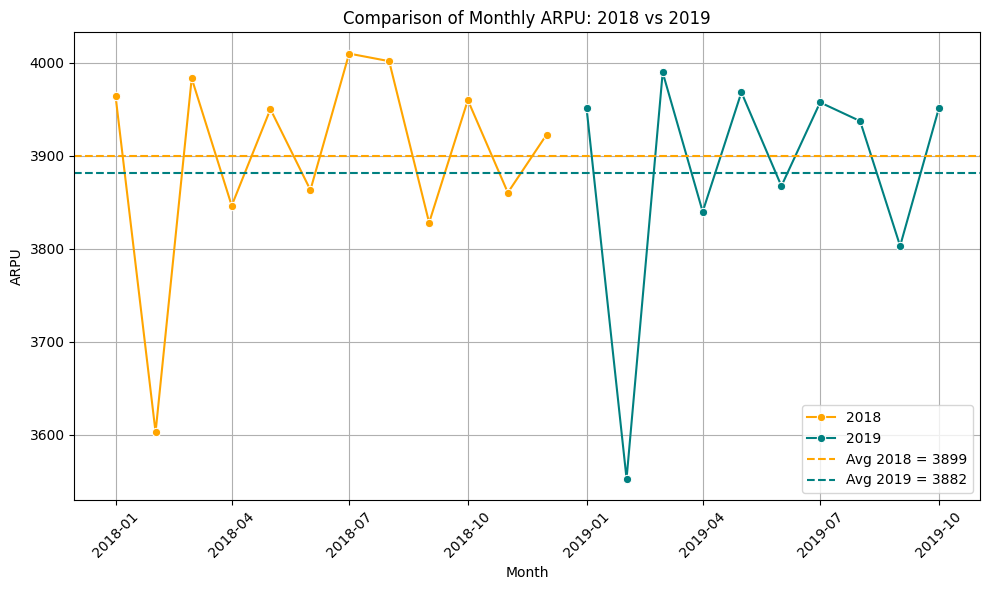

In [ ]:
# Split into two datasets for comparison
arpu_latest = arpu_filtered[arpu_filtered['year_month'].dt.year == latest_year]
arpu_prev = arpu_filtered[arpu_filtered['year_month'].dt.year == prev_year]

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=arpu_prev, x='year_month', y='arpu', marker='o', label=f'{prev_year}', color='orange')
sns.lineplot(data=arpu_latest, x='year_month', y='arpu', marker='o', label=f'{latest_year}', color='teal')

# Add horizontal average lines
plt.axhline(avg_arpu_prev, color='orange', linestyle='--', label=f'Avg 2018 = {avg_arpu_prev:.0f}')
plt.axhline(avg_arpu_latest, color='teal', linestyle='--', label=f'Avg 2019 = {avg_arpu_latest:.0f}')

plt.title(f'Comparison of Monthly ARPU: {prev_year} vs {latest_year}')
plt.xlabel('Month')
plt.ylabel('ARPU')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Key insides:
* 2018 had relatively stable ARPU values, with peaks in July and August.
* 2019 showed more fluctuation, especially a noticeable dip in February.
* Both years had similar ARPU levels overall, but 2018 maintained slightly higher consistency.

## b. New customers

In [ ]:
# Add 'is_new_customer' if not already present
if 'is_new_customer' not in trans_cleaned.columns:
    first_trans = trans_cleaned.groupby('client_id')['date'].min().reset_index()
    first_trans.rename(columns={'date': 'first_transaction_date'}, inplace=True)
    trans_cleaned = trans_cleaned.merge(first_trans, on='client_id', how='left')
    trans_cleaned['is_new_customer'] = trans_cleaned['date'] == trans_cleaned['first_transaction_date']

# Extract year
trans_cleaned['year'] = trans_cleaned['date'].dt.year

# Group by year to count new customers
yearly_new_customers = (
    trans_cleaned[trans_cleaned['is_new_customer']]
    .groupby('year')['client_id']
    .nunique()
    .reset_index()
    .rename(columns={'client_id': 'new_customers'})
)

print(yearly_new_customers)

   year  new_customers
0  2010           1137
1  2011             30
2  2012             15
3  2013             12
4  2014              8
5  2015              9
6  2016              6
7  2017              2


=> The transaction data absolutely does not have information on new customers for each year

## c. Gross Margin

In [ ]:
# Merge transaction data with MCC gross margin data
trans_margin = trans_cleaned.merge(mcc_gross_margin, on='mcc', how='left')
trans_margin[['mcc', 'description', 'industry', 'Gross Margin']].head()

,mcc,description,industry,Gross Margin
0,5311,Department Stores,Retail (General),0.322151
1,4829,NaN,NaN,NaN
2,5813,Drinking Places (Alcoholic Beverages),Restaurant/Dining,0.328958
3,5942,NaN,NaN,NaN
4,4784,NaN,NaN,NaN


In [ ]:
# Calculate the overall average (excluding NaNs)
avg_gross_margin = mcc_gross_margin['Gross Margin'].mean()

# Fill NaN values with the 25% of average industry (approxcimate 10%)
trans_margin['Gross Margin'].fillna(avg_gross_margin * 0.25, inplace=True)

# The Average Gross Margin
average_gross_margin = round(trans_margin['Gross Margin'].mean() * 100, 2)

/tmp/ipython-input-50-3496989964.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trans_margin['Gross Margin'].fillna(avg_gross_margin * 0.25, inplace=True)


In [ ]:
print(f"Average Gross Margin (%): {average_gross_margin}")

Average Gross Margin (%): 22.2


## d. Lifetime Value (LTV)?

In [ ]:
# Calculate lifetime span in days
cards['lifetime_days'] = (cards['expires'] - cards['acct_open_date']).dt.days

# Or in months (approximate)
cards['lifetime_months'] = cards['lifetime_days']// 30


In [ ]:
#Calculate monthly LTV per customer
ltv_monthly = (
  trans_cleaned
    .groupby(['client_id', 'year_month'])['amount']
    .sum()
    .reset_index()
    .rename(columns={'amount': 'ltv'})
)

 # Calculate average monthly LTV per client
avg_ltv_per_client = (
    ltv_monthly
    .groupby('client_id')['ltv']
    .mean()
    .reset_index()
    .rename(columns={'ltv': 'avg_monthly_ltv'})
)

avg_ltv_per_client

,client_id,avg_monthly_ltv
0,0,5122.259915
1,1,2710.308220
2,2,2414.976864
3,3,2372.715763
4,4,4866.969153
...,...,...
1214,1994,3927.455794
1215,1995,3459.935424
1216,1996,2879.879746
1217,1997,4822.918559


In [ ]:
result = avg_ltv_per_client.loc[avg_ltv_per_client['avg_monthly_ltv'].idxmax()]

In [ ]:
result

,62
client_id,96.000000
avg_monthly_ltv,20364.513136


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   client_id          2000 non-null   int64   
 1   current_age        2000 non-null   int64   
 2   retirement_age     2000 non-null   int64   
 3   birth_year         2000 non-null   int64   
 4   birth_month        2000 non-null   int64   
 5   gender             2000 non-null   category
 6   address            2000 non-null   string  
 7   latitude           2000 non-null   float64 
 8   longitude          2000 non-null   float64 
 9   per_capita_income  2000 non-null   float64 
 10  yearly_income      2000 non-null   float64 
 11  total_debt         2000 non-null   float64 
 12  credit_score       2000 non-null   int64   
 13  num_credit_cards   2000 non-null   int64   
dtypes: category(1), float64(5), int64(7), string(1)
memory usage: 205.3 KB


In [ ]:
users.sample(2)

,client_id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
1029,642,35,62,1984,5,Female,96 Ninth Drive,33.11,-94.16,16746.0,34143.0,49839.0,648,4
948,317,67,65,1952,3,Female,816 El Camino Drive,39.74,-121.60,15436.0,19199.0,15091.0,715,3


In [ ]:
users[users['current_age'] < 35]

,client_id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
7,1711,26,67,1993,12,Male,1941 Ninth Street,45.51,-122.64,26790.0,54623.0,114711.0,728,1
9,1752,34,60,1986,1,Female,887 Grant Street,29.97,-92.12,18730.0,38190.0,81262.0,810,1
10,192,27,66,1992,6,Male,888 Fifth Lane,38.65,-121.25,27548.0,56164.0,15224.0,761,2
11,640,29,63,1990,9,Female,8677 Littlewood Lane,40.42,-104.74,22427.0,45727.0,94016.0,629,1
12,1679,18,67,2002,1,Female,829 Fourth Boulevard,41.76,-71.48,33914.0,69149.0,89214.0,776,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,378,18,60,2001,5,Female,512 Second Avenue,46.21,-119.16,18753.0,38241.0,81833.0,596,1
1992,647,31,72,1988,7,Female,27 Birch Avenue,36.52,-119.39,13194.0,26900.0,74083.0,758,2
1994,588,21,66,1998,6,Male,2183 Catherine Boulevard,38.47,-90.75,23106.0,47109.0,76035.0,844,3
1995,986,32,70,1987,7,Male,6577 Lexington Lane,40.65,-73.58,23550.0,48010.0,87837.0,703,3


## 4.1. Spending by Age

### 📊 Charts

In [ ]:
# Merge users data with transactions data
trans_demo = trans_cleaned.merge(
    users[['client_id', 'current_age', 'gender', 'yearly_income', 'credit_score', 'num_credit_cards']],
    on='client_id', how='left')

# --- Chart 1: Total purchases by age group (all years) ---
# Create age groups
bins = [0, 25, 35, 50, 65, 100]
labels = ['<25', '25–35', '36–50', '51–65', '65+']
trans_demo['age_group'] = pd.cut(trans_demo['current_age'], bins=bins, labels=labels)

# Calculate total spending per age group
age_spending = trans_demo.groupby('age_group')['amount'].sum().sort_index()
age_spending_million = age_spending / 1_000_000

# --- Chart 2: Total purchases by age group in the last 3 years ---
trans_demo['year'] = pd.to_datetime(trans_demo['date']).dt.year
latest_3_years = sorted(trans_demo['year'].dropna().unique())[-3:]
filtered_data = trans_demo[trans_demo['year'].isin(latest_3_years)]

age_year_spending = (
    filtered_data.groupby(['year', 'age_group'])['amount']
    .sum()
    .reset_index()
)
age_year_spending['amount_million'] = age_year_spending['amount'] / 1_000_000

# --- Plotting ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart 1: Total purchases by age group (all data)
sns.barplot(x=age_spending_million.index, y=age_spending_million.values, palette='Blues', ax=ax1)
for i, v in enumerate(age_spending_million.values):
    ax1.text(i, v + 0.1, f"${v:.2f}M", ha='center', va='bottom', fontsize=10)
ax1.set_title("Total spending by Age groups (All years)", fontsize=13)
ax1.set_ylabel("Total spending ($ million)")
ax1.set_xlabel("Age groups")
ax1.grid(True, axis='y')

# Chart 2: Total purchases by age group in last 3 years
sns.barplot(
    data=age_year_spending,
    x='age_group',
    y='amount_million',
    hue='year',
    palette='Set2',
    ax=ax2
)
for container in ax2.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax2.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.05,
                f"${height:.0f}M",
                ha='center',
                va='bottom',
                fontsize=9
            )
ax2.set_title("Total spending by Age groups (Last 3 Years)", fontsize=13)
ax2.set_xlabel("Age groups")
ax2.set_ylabel("Total spending ($ million)")
ax2.legend(title="Year")
ax2.grid(axis='y')

plt.tight_layout()
plt.show()


### 🔍 Key Insides

📊 Chart 1: Total Purchases by Age Groups (All Years)

a. Highest Spending Group:
* The 36–50 age group has the highest total spending across all years.
* This group is likely in their financial prime — stable income, established careers, possibly supporting family and home ownership.

b. Second-Highest:
* The 51–65 group also shows strong spending, possibly due to peak earnings, healthcare, and lifestyle spending before retirement.

c. Younger Groups (<35):
* The <25 and 25–35 groups spend less overall, likely due to lower income, early career stages, or student status.
* This might also reflect a smaller proportion of this group in the dataset.

d. Elderly Group (65+):
* Lowest spending, possibly due to retirement and reduced income, or a lower number of users in this group.

📊 Chart 2: Total Purchases by Age Groups (Last 3 Years)

a- Consistency Across Years:
* The 36–50 and 51–65 groups consistently dominate spending across 2017, 2018, and 2019, confirming long-term purchasing power.

b- Slight Growth or Decline:
Some age groups show year-over-year variation:
- For example, 36–50 might increase slightly in some years — this could reflect economic growth or demographic shifts.
- Spending in 25–35 and <25 groups remains low but may slightly increase as these cohorts age.

c- Marketing Insight:
* Age groups 36–65 are your primary target for campaigns or promotions due to their consistently high contributions to total spend.

### 💡 Recommendations

* Focus marketing and financial products (e.g., credit cards, premium services) on the 36–65 segments.

* Engage younger users (<35) with tailored offers or education to build long-term customer value.

* Consider loyalty programs for the 36–50 and 51–65 groups to retain high-value customers.

* Analyze whether lower spend in older or younger groups is due to fewer users or lower average spending per person — this could guide acquisition strategy.

* Several suggested products and services as following:
 - For the <25 age group: Student offers, low-cost services, scholarships, installment payments, gamification
 - For the 25–35 age group: Small family combo packages, savings – investment, long-term offers
 - For the 36–50 age group: Insurance, personal finance, investment, luxury travel
 - For the 51–65 age group: Health care, retirement insurance, retirement savings
 - For the 65+ age group: Simple products, direct support, special care

## 4.2. Spending by Gender

### 📊 Charts

/tmp/ipython-input-49-3987280356.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_spending = trans_demo.groupby('gender')['amount'].sum()
/tmp/ipython-input-49-3987280356.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_gender.groupby(['year', 'gender'])['amount']
/tmp/ipython-input-49-3987280356.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=gender_spending_million.index, y=gender_spending_million.values, palette='pas

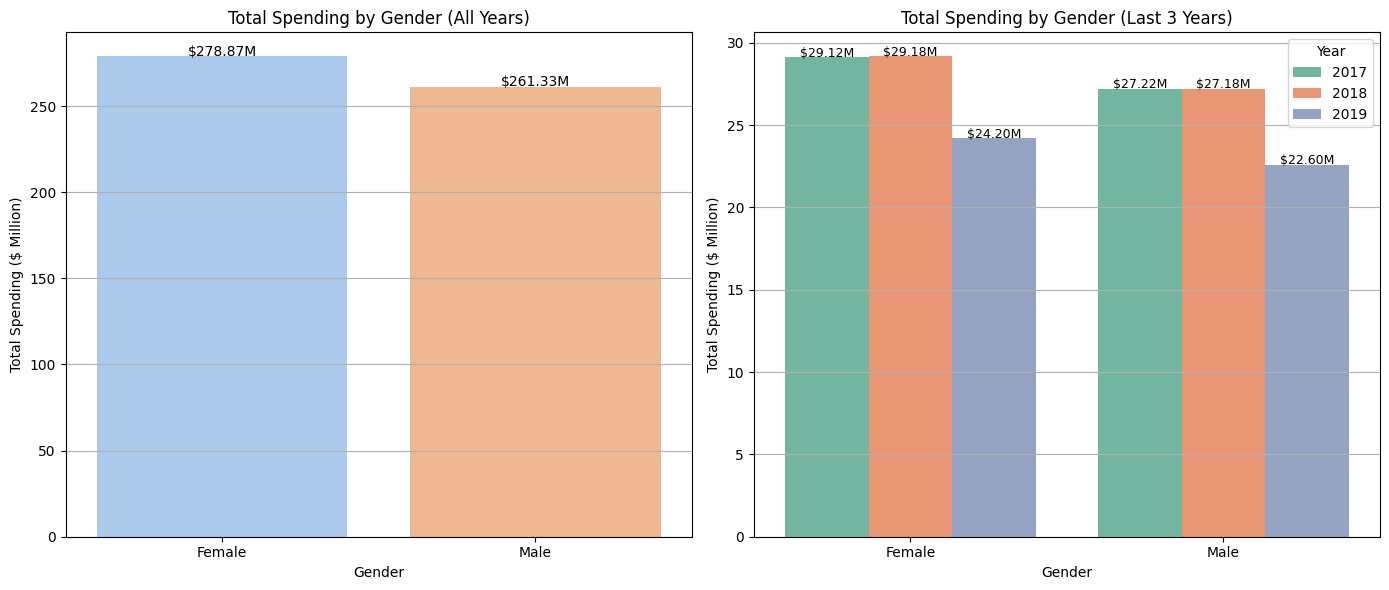

In [ ]:
# Extract year from date
# trans_demo['year'] = pd.to_datetime(trans_demo['date']).dt.year

# Get latest 3 years
# latest_3_years = sorted(trans_demo['year'].dropna().unique())[-3:]

# ===== Chart 1: Total purchases by gender (All years) =====
gender_spending = trans_demo.groupby('gender')['amount'].sum()
gender_spending_million = gender_spending / 1_000_000

# ===== Chart 2: Total purchases by gender in last 3 years =====
filtered_gender = trans_demo[trans_demo['year'].isin(latest_3_years)]
gender_year_spending = (
    filtered_gender.groupby(['year', 'gender'])['amount']
    .sum()
    .reset_index()
)
gender_year_spending['amount_million'] = gender_year_spending['amount'] / 1_000_000

# ===== Plot both charts side-by-side =====
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1
sns.barplot(ax=axes[0], x=gender_spending_million.index, y=gender_spending_million.values, palette='pastel')
axes[0].set_title("Total Spending by Gender (All Years)")
axes[0].set_ylabel("Total Spending ($ Million)")
axes[0].set_xlabel("Gender")
axes[0].grid(axis='y')
for i, v in enumerate(gender_spending_million.values):
    axes[0].text(i, v + 0.1, f"${v:.2f}M", ha='center', fontsize=10)

# Chart 2
sns.barplot(ax=axes[1], data=gender_year_spending, x='gender', y='amount_million', hue='year', palette='Set2')
axes[1].set_title(f"Total Spending by Gender (Last 3 Years)")
axes[1].set_ylabel("Total Spending ($ Million)")
axes[1].set_xlabel("Gender")
axes[1].legend(title="Year")
axes[1].grid(axis='y')
for container in axes[1].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            axes[1].text(bar.get_x() + bar.get_width()/2, height + 0.05, f"${height:.2f}M", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


### 🔍 Key Insides
Females contributed a higher total purchase amount than males.
The difference is visibly significant, not marginal.
This could be due to:
- Female customers may make more frequent or higher-value transactions.
- Product/service categories that typically attract female consumers (e.g., retail, fashion, groceries, wellness, personal care, household goods) may dominate in the platform.



### 💡 Recommendations

1- Consider gender-targeted campaigns:
* For females:
 - Loyalty programs or cash‑back on categories popular among female users (apparel, beauty, groceries).
 - Upselling or Cross‑sell high‑margin services where female adoption is low but potential demand exists (e.g., travel, insurance).
 - Referrals for getting new customers from their relationships
* For males: tailored offers or onboarding journeys to increase engagement.

2- Deep-dive into user count and ARPU by gender
→ Is higher total spending due to more users or higher spend per user?

3- Explore spending by MCC (merchant category code) & gender
→ Understand what sectors female vs. male users are spending on.

## 4.3. Spending by Income

/tmp/ipython-input-50-1570617449.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_spending = trans_demo.groupby('income_group')['amount'].sum()
/tmp/ipython-input-50-1570617449.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_income.groupby(['year', 'income_group'])['amount']
/tmp/ipython-input-50-1570617449.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=income_spending_million.index, y=income_spending_million.values,

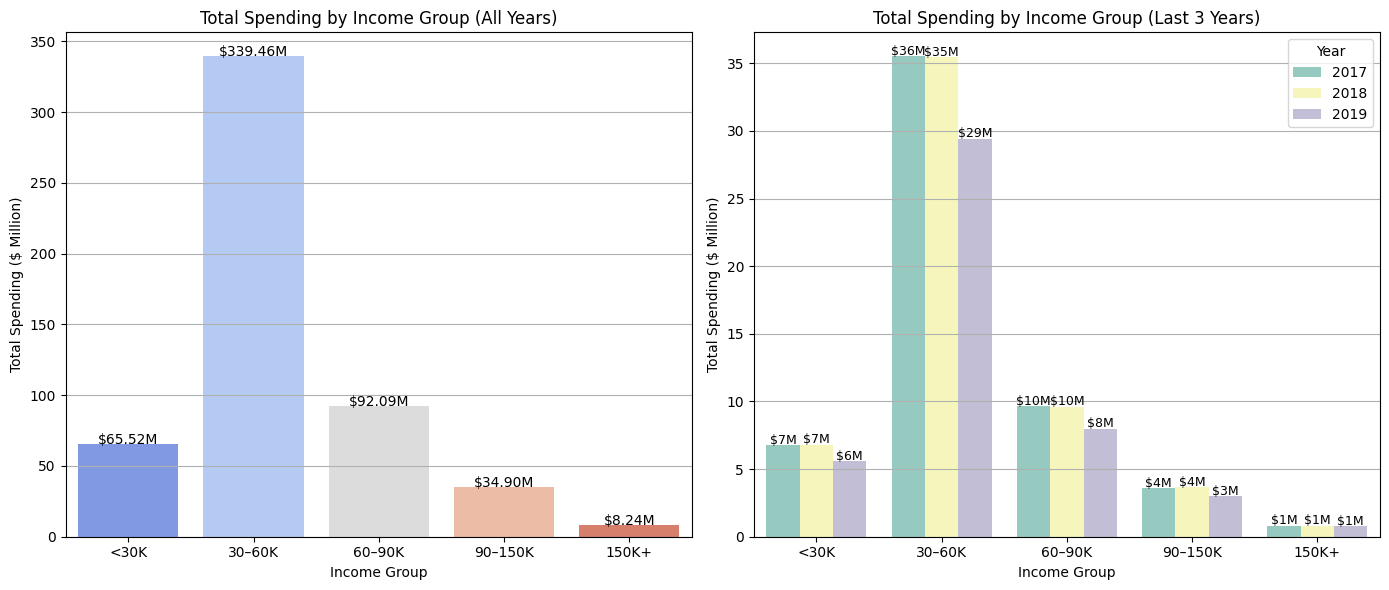

In [ ]:
# Define latest 3 years (already extracted)
# trans_demo['year'] = pd.to_datetime(trans_demo['date']).dt.year
# latest_3_years = sorted(trans_demo['year'].dropna().unique())[-3:]

# Create income bins (adjust as appropriate for your data)
income_bins = [0, 30000, 60000, 90000, 150000, float('inf')]
income_labels = ['<30K', '30–60K', '60–90K', '90–150K', '150K+']
trans_demo['income_group'] = pd.cut(trans_demo['yearly_income'], bins=income_bins, labels=income_labels)

# ===== Chart 1: Total purchases by income (All years) =====
income_spending = trans_demo.groupby('income_group')['amount'].sum()
income_spending_million = income_spending / 1_000_000

# ===== Chart 2: Total purchases by income in last 3 years =====
filtered_income = trans_demo[trans_demo['year'].isin(latest_3_years)]
income_year_spending = (
    filtered_income.groupby(['year', 'income_group'])['amount']
    .sum()
    .reset_index()
)
income_year_spending['amount_million'] = income_year_spending['amount'] / 1_000_000

# ===== Plot both charts side-by-side =====
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1
sns.barplot(ax=axes[0], x=income_spending_million.index, y=income_spending_million.values, palette='coolwarm')
axes[0].set_title("Total Spending by Income Group (All Years)")
axes[0].set_ylabel("Total Spending ($ Million)")
axes[0].set_xlabel("Income Group")
axes[0].grid(axis='y')
for i, v in enumerate(income_spending_million.values):
    axes[0].text(i, v + 0.1, f"${v:.2f}M", ha='center', fontsize=10)

# Chart 2
sns.barplot(ax=axes[1], data=income_year_spending, x='income_group', y='amount_million', hue='year', palette='Set3')
axes[1].set_title("Total Spending by Income Group (Last 3 Years)")
axes[1].set_ylabel("Total Spending ($ Million)")
axes[1].set_xlabel("Income Group")
axes[1].legend(title="Year")
axes[1].grid(axis='y')
for container in axes[1].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            axes[1].text(bar.get_x() + bar.get_width()/2, height + 0.1, f"${height:.0f}M", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


### 🔍 Key Insides

📊 Chart 1: Total Purchases by Income Group (All Years)

1- Purchasing Power Increases with Income:
* Customers in higher income brackets (especially 90–150K and 150K+) contribute significantly more to total spending than those in lower brackets.
* The 150K+ group likely leads in total purchase value, suggesting a strong correlation between income and overall spending.

2- Middle-Income Strength:
* The 60–90K and 90–150K groups also contribute substantially, showing that middle-to-upper income customers form the core of the company’s revenue.

3- Lower-Income Groups (<30K and 30–60K):
* These groups have noticeably lower total purchases, indicating limited discretionary spending or possibly less engagement.

📊 Chart 2: Total Purchases by Income Group (Last 3 Years)

1- Stable Spending Pattern Across Years:
* The relative spending pattern across income groups remains consistent year-over-year, reinforcing the observation that higher-income customers are the most valuable.

2- Growth in Top Income Brackets:
* If the 150K+ group is growing year-over-year, this suggests the company may be attracting or retaining more high-value clients.
* Alternatively, spending per individual in that group may be increasing.

3- Limited Change in Low-Income Groups:
* The lowest income brackets (<30K) show minimal change across the 3 years, indicating a plateau in engagement or purchasing ability.

### 💡 Recommendations
* Focus retention and upselling efforts on the 90K+ income groups, as they drive a disproportionate share of revenue.

* Consider tiered product offerings to match income profiles — premium services for high-income customers, budget options for lower-income segments.

* Marketing efforts targeting middle-income groups (60–90K) may offer a good ROI, as they show healthy spending but may still be expandable.

* For lower-income customers, focus on engagement and product fit, or consider reallocating resources unless there’s long-term potential (e.g. students, young professionals).

## 4.4. ARPU 2019 by Income

/tmp/ipython-input-51-2721180050.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  latest_year_data.groupby('income_group')
/tmp/ipython-input-51-2721180050.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: df['amount'].sum() / df['client_id'].nunique())
/tmp/ipython-input-51-2721180050.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barpl

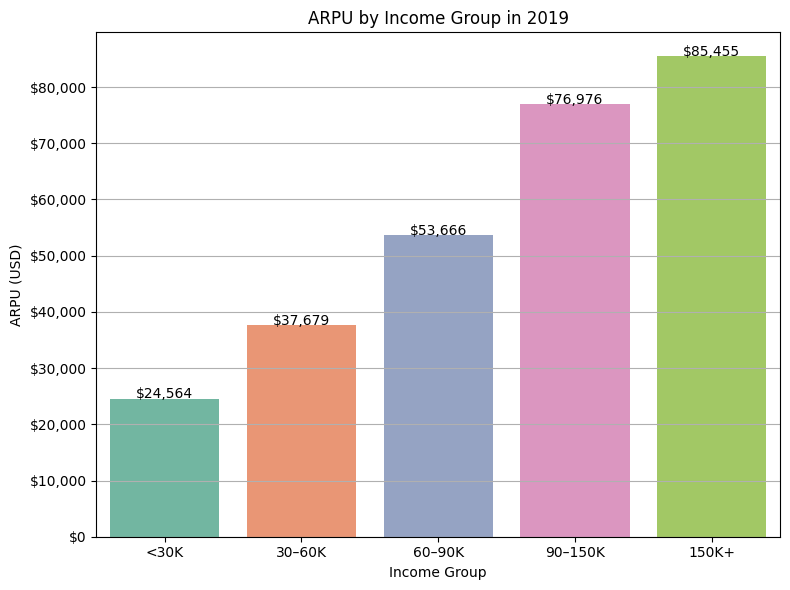

In [ ]:
# Ensure datetime and year extraction
trans_demo['date'] = pd.to_datetime(trans_demo['date'])
trans_demo['year'] = trans_demo['date'].dt.year

# Identify the latest year
latest_year = trans_demo['year'].max()

# Filter data for latest year only
latest_year_data = trans_demo[trans_demo['year'] == latest_year]

# Calculate ARPU per income group
arpu_income = (
    latest_year_data.groupby('income_group')
    .apply(lambda df: df['amount'].sum() / df['client_id'].nunique())
    .reset_index(name='ARPU')
)

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(data=arpu_income, x='income_group', y='ARPU', palette='Set2')

# Format y-axis with $ and thousand separator
from matplotlib.ticker import FuncFormatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Add value labels
for i, row in arpu_income.iterrows():
    plt.text(i, row['ARPU'] + 50, f"${row['ARPU']:,.0f}", ha='center', fontsize=10)

plt.title(f"ARPU by Income Group in {latest_year}")
plt.xlabel("Income Group")
plt.ylabel("ARPU (USD)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 4.5. Spending by Credit Score

### 📊 Charts

/tmp/ipython-input-95-3366540353.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trans_last_year.groupby('score_group')['amount']
/tmp/ipython-input-95-3366540353.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trans_demo.groupby('score_group')['amount']
/tmp/ipython-input-95-3366540353.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=score_spending_total.index, y=score_spending_total.values, palette='Purples')


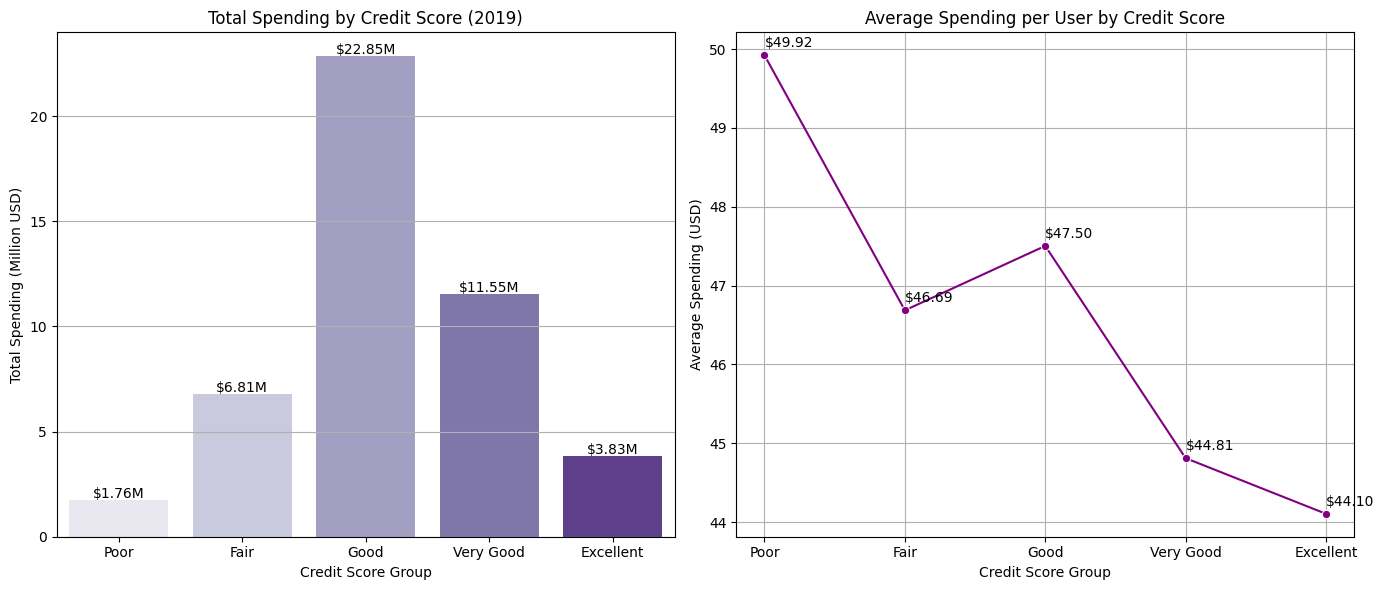

In [ ]:
# === Prepare data ===
score_bins = [0, 580, 670, 740, 800, 850]
score_labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
trans_demo['score_group'] = pd.cut(
    trans_demo['credit_score'],
    bins=score_bins,
    labels=score_labels
)

# Ensure datetime and year extraction
trans_demo['date'] = pd.to_datetime(trans_demo['date'])
trans_demo['year'] = trans_demo['date'].dt.year

last_year = trans_demo['year'].max()
trans_last_year = trans_demo[trans_demo['year'] == last_year]

# 1. Total spending by score group in last year (in million USD)
score_spending_total = (
    trans_last_year.groupby('score_group')['amount']
    .sum()
    .reindex(score_labels) / 1_000_000
)

# 2. Mean spending per user by score group (all years)
score_spending_avg = (
    trans_demo.groupby('score_group')['amount']
    .mean()
    .reindex(score_labels)
)

# === Plotting ===
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1: Total Spending (Last Year)
sns.barplot(ax=axes[0], x=score_spending_total.index, y=score_spending_total.values, palette='Purples')
axes[0].set_title(f"Total Spending by Credit Score ({last_year})")
axes[0].set_ylabel("Total Spending (Million USD)")
axes[0].set_xlabel("Credit Score Group")
axes[0].grid(axis='y')
for i, v in enumerate(score_spending_total.values):
    axes[0].text(i, v + 0.1, f"${v:,.2f}M", ha='center', fontsize=10)

# Chart 2: Average Spending (All Years)
sns.lineplot(ax=axes[1], x=score_spending_avg.index, y=score_spending_avg.values, marker='o', color='purple')
axes[1].set_title("Average Spending per User by Credit Score")
axes[1].set_xlabel("Credit Score Group")
axes[1].set_ylabel("Average Spending (USD)")
axes[1].grid(True)
for i, v in enumerate(score_spending_avg.values):
    axes[1].text(i, v + 0.1, f"${v:,.2f}", ha='left', fontsize=10)

plt.tight_layout()
plt.show()


### 🔍 Key Insides
📊 Chart 1: Total Spending by Credit Score Group (Last Year)

1- "Good" and "Very Good" groups contribute the highest total spending:
* These two score groups dominate the total purchases, indicating that users with moderate to strong credit are driving most of the transaction volume.
* This may reflect greater credit access, spending confidence, or card usage frequency.

2- "Poor" and "Fair" groups contribute the least:
* Users in the low credit score range show significantly lower total spending, likely due to limited credit availability, lower income, or risk-averse behavior.

3- "Excellent" group is smaller in contribution than expected:
* Despite having top scores, this group spends less in total, which might be due to:
 - Fewer users in this group (smaller population),
 - More conservative or strategic spending behavior,
 - Preference for alternative payment channels.

📈 Chart 2: Average Spending per User by Credit Score Group (All Years)

1- Highest Spending from the “Poor” Group:
* Surprisingly, users in the Poor credit score range (<580) spent the most on average.
* This might seem counterintuitive but could be due to:
 - Small user count skewing the mean,
 - Overreliance on credit cards for daily needs,
 - Or lack of financial discipline leading to higher, unplanned spending.

2- Spending Decreases as Credit Score Improves:
* There’s a gradual decline in average spending from Poor → Excellent.
* This trend may indicate:
 - Higher-score users are more financially disciplined,
 - They optimize or diversify spending through multiple channels (e.g., bank transfers, digital wallets),
 - Or they’re less dependent on cards for purchases.

3- Low Variation Among Groups:
* The difference between the highest [Poor – 49.92 USD] and lowest [Excellent – 44.10 USD] is only ~5.8 USD, suggesting that credit score may not strongly influence average per-transaction spending.

### 💡 Recommendations
* Investigate the "Poor" group further—are there a few high spenders driving up the average?
* Design financial wellness programs to help low-score customers manage spending better and reduce credit risk.
* Focus marketing and product offers on "Good" and "Very Good" score groups, as they combine high volume and high average spend.
* Consider education and credit-building tools for "Poor" and "Fair" segments to encourage more engagement and potential growth.
* Investigate user behavior in the "Excellent" segment: Are they underutilizing their credit cards? Could premium rewards or alternative products (like investment-linked cards) better serve them?

## 4.6. Spending by Credit Cards

### 📊 Charts

/tmp/ipython-input-106-368818141.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=card_total_spending.index, y=card_total_spending.values, palette='Blues')


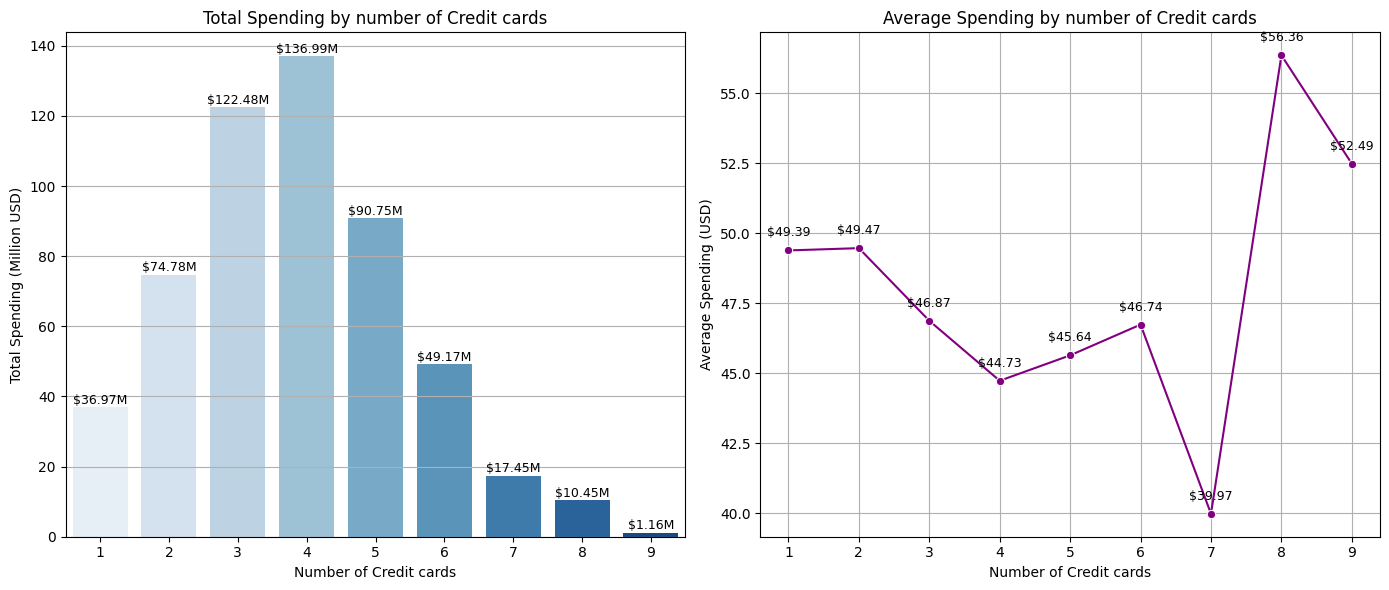

In [ ]:
# Grouping: Average and Total Spending
card_avg_spending = trans_demo.groupby('num_credit_cards')['amount'].mean()
card_total_spending = trans_demo.groupby('num_credit_cards')['amount'].sum() / 1_000_000  # In million USD

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1: Total Spending
sns.barplot(ax=axes[0], x=card_total_spending.index, y=card_total_spending.values, palette='Blues')
axes[0].set_title("Total Spending by number of Credit cards")
axes[0].set_xlabel("Number of Credit cards")
axes[0].set_ylabel("Total Spending (Million USD)")
for i, v in enumerate(card_total_spending.values):
    axes[0].text(i, v + 1, f"${v:,.2f}M", ha='center', fontsize=9)
axes[0].grid(axis='y')

# Chart 2: Average Spending
sns.lineplot(ax=axes[1], x=card_avg_spending.index, y=card_avg_spending.values, marker='o', color='purple')
axes[1].set_title("Average Spending by number of Credit cards")
axes[1].set_xlabel("Number of Credit cards")
axes[1].set_ylabel("Average Spending (USD)")
axes[1].grid(True)

# Add value labels to line plot
for x, y in zip(card_avg_spending.index, card_avg_spending.values):
    axes[1].text(x, y + 0.5, f"${y:,.2f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

### 🔍 Key insides
📊 Chart 1: Total Spending by Number of Credit Cards
1- Peak Spending at 4 Cards:
* Users with 4 credit cards contribute the highest total spending: $137M, even higher than those with 3 or 5 cards.
* This group likely represents a high-value segment combining both high average spend and large population.

2- Steady Rise Up to 4 Cards:
* Spending increases significantly from 1 → 4 cards, reflecting both higher spending per user and possibly higher number of users in those segments.

3- Declining Trend After 4 Cards:
* Beyond 4 cards, total spending drops sharply:
 - 5 cards → 90.75M
 - 6 cards → 49.17M
 - 9 cards → just $1.16M
* These users likely represent a smaller group or lower engagement level.

📊 Chart 2: Average Spending per User by Number of Credit Cards
1- Relatively Stable Spending (1–6 cards):
* Average spending stays in a narrow band (44~49USD) from 1 to 6 cards.
* Suggests no strong positive or negative linear relationship between card count and average spend for most users.

2- Dip at 7 Cards:
* Users with 7 credit cards spend the least on average ($39.97).
* This may reflect inactive cards, credit fatigue, or financial caution.

3- Surge at 8–9 Cards:
* Surprisingly, users with 8 cards spend the most on average (56.36 USD), followed by those with 9 cards ($52.49).
* This could indicate a small, high-value user group—possibly premium or business users.

### 💡 Recommendations

1- The high-priority segment:
* Users with 3–4 cards are your top contributors to total revenue.

2- Growth opportunity:
* Encourage cross-selling to 1–2 card holders (who already show strong total contribution) to adopt more cards.

3- Re-evaluate high-card users (6–9):
* Investigate if they're inactive, over-leveraged, or outside your ideal customer profile.
* Analyze their profile (age, income, segment).
* Offer loyalty rewards or exclusive tiers  (e.g., credit limit increases, rewards programs).

4- Specially monitor the 7-card group for inactivity or churn risk.

2. Phân tích hành vi theo ngành hàng (mcc), loại thẻ, và hạn mức tín dụng

/tmp/ipython-input-116-424023382.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_by_industry = trans_mcc.groupby('industry')['amount'].sum().sort_values(ascending=False)


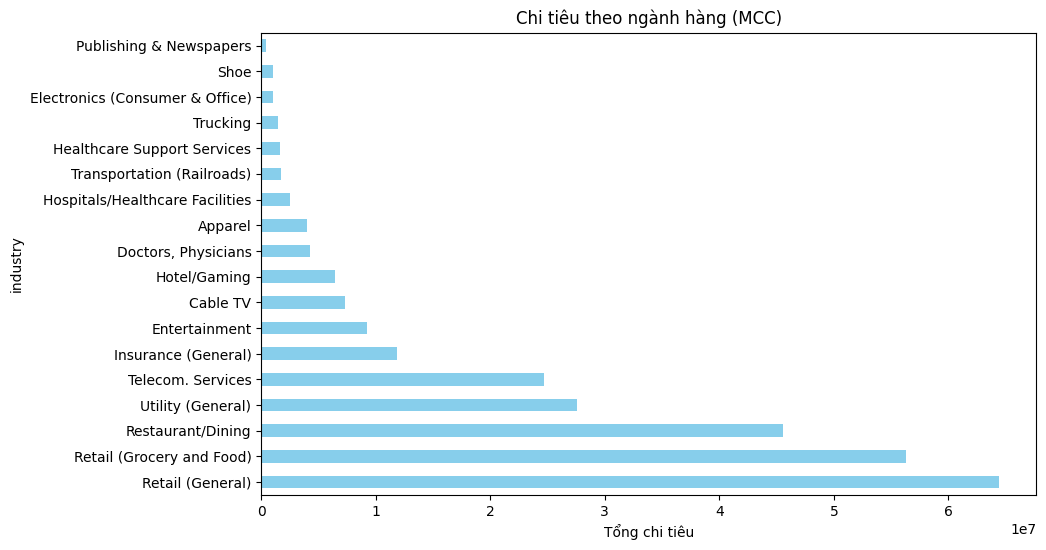

In [ ]:
# Gộp với bảng mô tả mcc
trans_mcc = trans_cleaned.merge(mcc_gross_margin[['mcc', 'industry']], on='mcc', how='left')

spending_by_industry = trans_mcc.groupby('industry')['amount'].sum().sort_values(ascending=False)

# Biểu đồ
spending_by_industry.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title("Chi tiêu theo ngành hàng (MCC)")
plt.xlabel("Tổng chi tiêu")
plt.show()


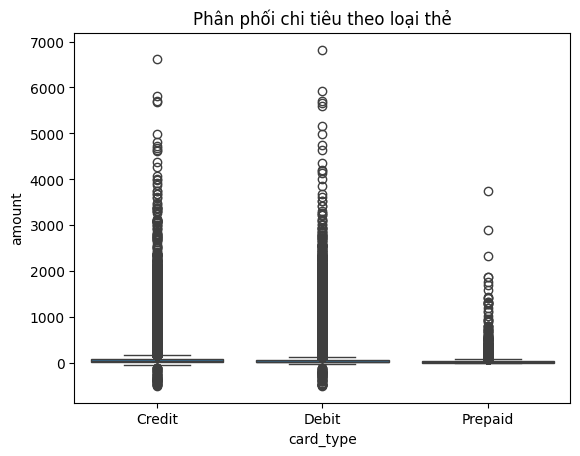

In [ ]:
trans_card_type = trans_cleaned.merge(cards[['card_id', 'card_type', 'credit_limit']], on='card_id', how='left')

sns.boxplot(x='card_type', y='amount', data=trans_card_type)
plt.title("Phân phối chi tiêu theo loại thẻ")
plt.show()


In [ ]:
trans_card_type.sample(2)

,trans_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,amount_rounded,card_type,credit_limit,limit_group
11244867,23231320,2019-07-11 14:31:00,1411,1069,40.00,Chip,27092,Hoffman Estates,IL,60192,4829,NaN,40.00,Credit,18200.0,Khá
2704899,11242345,2012-06-10 12:49:00,760,5876,13.25,Swipe,75781,Columbus,OH,43228,5411,NaN,13.25,Credit,9100.0,Trung bình


/tmp/ipython-input-48-2518667886.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_by_limit = trans_card_type.groupby('limit_group')['amount'].sum()


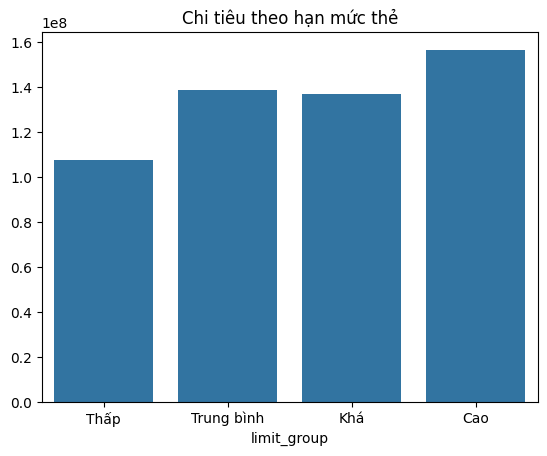

In [ ]:
# Chia thành các phân vị hạn mức
trans_card_type['limit_group'] = pd.qcut(trans_card_type['credit_limit'], 4, labels=["Thấp", "Trung bình", "Khá", "Cao"])
spending_by_limit = trans_card_type.groupby('limit_group')['amount'].sum()

sns.barplot(x=spending_by_limit.index, y=spending_by_limit.values)
plt.title("Chi tiêu theo hạn mức thẻ")
plt.show()


3. Thống kê tần suất giao dịch, doanh số theo tuần/tháng/năm

In [ ]:
# Tạo các cột thời gian:
trans_cleaned['date'] = pd.to_datetime(trans_cleaned['date'])
trans_cleaned['week'] = trans_cleaned['date'].dt.to_period('W').apply(lambda r: r.start_time)
trans_cleaned['month'] = trans_cleaned['date'].dt.to_period('M').dt.to_timestamp()
trans_cleaned['year'] = trans_cleaned['date'].dt.year


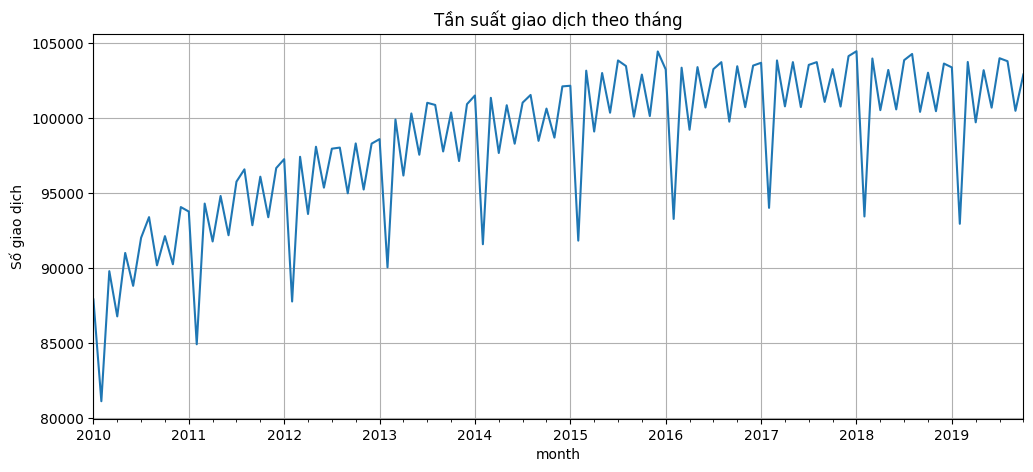

In [51]:
# Tần suất giao dịch:
freq_week = trans_cleaned.groupby('week')['trans_id'].count()
freq_month = trans_cleaned.groupby('month')['trans_id'].count()
freq_year = trans_cleaned.groupby('year')['trans_id'].count()

# Biểu đồ
freq_month.plot(figsize=(12,5), title="Tần suất giao dịch theo tháng")
plt.ylabel("Số giao dịch")
plt.grid(True)
plt.show()
